In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import calendar
import matplotlib.image as mpimg
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)



pd.set_option('display.max_columns', None)

## Exploring our Data

First, let's load and check our dataframe.

In [4]:
# Load DataFrame
df = pd.read_csv('D:\Data_Science\Datasets\Motor_Vehicle_Collisions.csv')

C:\Users\yaros\AppData\Local\Temp\ipykernel_5140\4163908653.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:\Data_Science\Datasets\Motor_Vehicle_Collisions.csv')


In [5]:
# Show first 5 rows 
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,0.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


First thing that may seem scary here is a lot of NaN values. But we will inspect them closely in a bit.

In [6]:
# Check columns
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [7]:
# Check df's shape
df.shape

(2115580, 29)

Let's see what kind of columns we have and what types we are dealing with.

In [8]:
# Check datatypes of the columns
df.info(verbose=True, show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115580 entries, 0 to 2115579
Data columns (total 29 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CRASH DATE                     2115580 non-null  object 
 1   CRASH TIME                     2115580 non-null  object 
 2   BOROUGH                        1457532 non-null  object 
 3   ZIP CODE                       1457272 non-null  object 
 4   LATITUDE                       1871730 non-null  float64
 5   LONGITUDE                      1871730 non-null  float64
 6   LOCATION                       1871730 non-null  object 
 7   ON STREET NAME                 1663443 non-null  object 
 8   CROSS STREET NAME              1310654 non-null  object 
 9   OFF STREET NAME                359764 non-null   object 
 10  NUMBER OF PERSONS INJURED      2115562 non-null  float64
 11  NUMBER OF PERSONS KILLED       2115549 non-null  float64
 12  NUMBER OF PEDE

In [9]:
# Check rows where persons killed is not na
df.loc[df['NUMBER OF PERSONS KILLED'].notna()]

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,0.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115575,08/06/2024,12:00,QUEENS,11001.0,NaN,NaN,NaN,JAMAICA AVENUE,LITTLE NECK PARKWAY,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4746496,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2115576,08/05/2024,5:00,QUEENS,11434.0,NaN,NaN,NaN,132 AVENUE,155 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4746463,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2115577,07/29/2024,2:30,NaN,NaN,40.723442,-73.938990,"(40.723442, -73.93899)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,4746455,Tractor Truck Diesel,Sedan,NaN,NaN,NaN
2115578,08/02/2024,15:48,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4746469,Sedan,Pick-up Truck,NaN,NaN,NaN


Now, it's also good to check the stats for numeric columns. 

In [10]:
# Stats for numeric rows
df[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',	'NUMBER OF PEDESTRIANS KILLED',	'NUMBER OF CYCLIST INJURED',	'NUMBER OF CYCLIST KILLED',	'NUMBER OF MOTORIST INJURED',	'NUMBER OF MOTORIST KILLED']].describe().round(3)

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
count,2115562.000,2115549.000,2115580.000,2115580.000,2115580.000,2115580.000,2115580.000,2115580.000
mean,0.315,0.002,0.057,0.001,0.027,0.000,0.227,0.001
std,0.705,0.041,0.245,0.028,0.166,0.011,0.666,0.027
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,43.000,8.000,27.000,6.000,4.000,2.000,43.000,5.000


So, we gathered some basic information about our dataframe, but good thing to do is to change naming of some columns, so it will be easier to work on data analysis. 

In [11]:
# Lower all columns
df.columns = df.columns.str.lower()

In [12]:
# Rename columns
df = df.rename(columns={'crash date': 'crash_date', 'crash time': 'crash_time', 'zip code': 'zip', 'on street name': 'on_street_name', 'cross street name':'cross_street_name', 
        'number of persons injured': 'persons_injured', 'number of persons killed': 'persons_killed', 'number of pedestrians injured': 'pedestrians_injured',
        'number of pedestrians killed': 'pedestrians_killed', 'number of cyclist injured': 'cyclist_injured', 'number of cyclist killed': 'cyclist_killed',
        'number of motorist injured': 'motorist_injured', 'number of motorist killed': 'motorist_killed', 'contributing factor vehicle 1': 'contributing_factor_vehicle_1',
        'contributing factor vehicle 2':'contributing_factor_vehicle_2','contributing factor vehicle 3':'contributing_factor_vehicle_3','contributing factor vehicle 4':'contributing_factor_vehicle_4',
        'contributing factor vehicle 5':'contributing_factor_vehicle_5', 'vehicle type code 1': 'vehicle_1_type', 'vehicle type code 2': 'vehicle_2_type', 'vehicle type code 3': 'vehicle_3_type',
        'vehicle type code 4': 'vehicle_4_type', 'vehicle type code 5':'vehicle_5_type', 'off street name': 'off_street_name'})
df.columns

Index(['crash_date', 'crash_time', 'borough', 'zip', 'latitude', 'longitude',
       'location', 'on_street_name', 'cross_street_name', 'off_street_name',
       'persons_injured', 'persons_killed', 'pedestrians_injured',
       'pedestrians_killed', 'cyclist_injured', 'cyclist_killed',
       'motorist_injured', 'motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'collision_id', 'vehicle_1_type', 'vehicle_2_type', 'vehicle_3_type',
       'vehicle_4_type', 'vehicle_5_type'],
      dtype='object')

As we could notice before, we have a lot of NaN values, as some data may not be applicable in our case. But to fix that, we have to figure out how we want to fill those missing values. To start off, we can fillna's injured and killed people

In [13]:
# Check for NaN values
print(df['persons_injured'].isna().sum())
print(df['persons_killed'].isna().sum())
print(df['pedestrians_injured'].isna().sum())
print(df['pedestrians_killed'].isna().sum())
print(df['cyclist_injured'].isna().sum())
print(df['cyclist_killed'].isna().sum())
print(df['motorist_injured'].isna().sum())
print(df['motorist_killed'].isna().sum())

18
31
0
0
0
0
0
0


Here, we only need to change persons_injured and persons_killed NaN values

In [14]:
# Fill Nan
df['persons_injured'] = df['persons_injured'].fillna(0)
df['persons_killed'] = df['persons_killed'].fillna(0)

In [15]:
# Check crash time column
df['crash_time'].head()

0     2:39
1    11:45
2     6:55
3     9:35
4     8:13
Name: crash_time, dtype: object

Now, let's drop some columns and add the ones we may need in the future. We have column crash time with hour and minute as a data point. We don't really need minute data for our analysis, as we have more than 2 million records, and when doing data analysis it will not be applicable for us.

In [16]:
# Function to adjust hour
#   Here, if minute part is > 30, then the hour will be +1 to what we had. If it's less than 30 - hour stays the same.
def adjust_hour(crash_time):
    hour, minute = crash_time.split(':')
    hour = int(hour)
    minute = int(minute)
    if minute > 30: 
        hour+=1
    if hour == 24:
        hour = 0
    return hour


df['crash_hour'] = df['crash_time'].apply(adjust_hour)
    

In [17]:
df.head()

,crash_date,crash_time,borough,zip,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_1_type,vehicle_2_type,vehicle_3_type,vehicle_4_type,vehicle_5_type,crash_hour
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN,3
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN,12
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,7
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN,10
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,0.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN,8


In [18]:
# Convert to datetime and create new column year-month
df['crash_date'] = pd.to_datetime(df['crash_date'])
df['year'] = df['crash_date'].dt.year
df['month'] = df['crash_date'].dt.month
df['crash_date_year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)


Let's see if we need and want to keep column where crash occured with 5 cars

In [19]:
# Check how many notna values.
df['vehicle_5_type'].notna().sum()

np.int64(9074)

There are almost 9100 car crashes that involved 5 cars, which is enough data to perform analysis on, so we will not drop it, but let's drop other columns that we won't need anymore.

In [20]:
# Drop columns we won't need 
df.drop(['crash_time','location', 'year', 'month'], axis=1, inplace=True)

# Change the datatype of some columns
df[['persons_injured','persons_killed', 'zip']] = df[['persons_injured','persons_killed', 'zip']].apply(pd.to_numeric, errors='coerce').astype('Int64')  

Now it will be a good idea to understand each column in-depth to be clear about each unique case.

In [21]:
df.head()

,crash_date,borough,zip,latitude,longitude,on_street_name,cross_street_name,off_street_name,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_1_type,vehicle_2_type,vehicle_3_type,vehicle_4_type,vehicle_5_type,crash_hour,crash_date_year_month
0,2021-09-11,NaN,<NA>,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2,0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN,3,2021-09
1,2022-03-26,NaN,<NA>,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1,0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN,12,2022-03
2,2022-06-29,NaN,<NA>,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,7,2022-06
3,2021-09-11,BROOKLYN,11208,40.667202,-73.866500,NaN,NaN,1211 LORING AVENUE,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN,10,2021-09
4,2021-12-14,BROOKLYN,11233,40.683304,-73.917274,SARATOGA AVENUE,DECATUR STREET,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN,8,2021-12


Everything looks pretty straight forward with first columns (crash_date, borough, zip, location), but in the street names we sometimes have missing values for different columns. 

So, let's break it down.

In [22]:
# Check if there are columns with all 3 not empty values
df.loc[(df['on_street_name'].notna())&(df['cross_street_name'].notna())&(df['off_street_name'].notna())].head()

,crash_date,borough,zip,latitude,longitude,on_street_name,cross_street_name,off_street_name,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_1_type,vehicle_2_type,vehicle_3_type,vehicle_4_type,vehicle_5_type,crash_hour,crash_date_year_month
1054709,2016-07-24,MANHATTAN,10028,40.773709,-73.947934,,,516 EAST 83 STREET,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3488074,PASSENGER VEHICLE,OTHER,NaN,NaN,NaN,9,2016-07
1088995,2016-06-17,QUEENS,11691,40.595934,-73.759619,SEAGIRT BOULEVARD,BEACH 26 STREET,,1,0,0,0,0,0,1,0,Unspecified,Unspecified,NaN,NaN,NaN,3466893,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,20,2016-06
1091455,2016-06-15,NaN,<NA>,NaN,NaN,,,8 AVENUE,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3462862,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,14,2016-06
1093659,2016-06-18,QUEENS,11105,40.768888,-73.906908,SOUND STREET,ASTORIA BLVD NORTH,,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3463912,BICYCLE,PASSENGER VEHICLE,NaN,NaN,NaN,4,2016-06
1109953,2016-05-27,NaN,<NA>,NaN,NaN,,,56-45 BOOTH MEMORIAL AVENUE,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3446477,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,9,2016-05


In [23]:
df['on_street_name'].iloc[1054709]

'                                '

In [24]:
df['cross_street_name'].iloc[1054709]

'                                '

In [25]:
df['off_street_name'].iloc[1088995]

'                                        '

Okay, so this row is just empty, instead of being NaN. We will have to fix it.

In [26]:
# Replace specified values with NaN
df['on_street_name'] = df['on_street_name'].replace('                                ', np.nan)
df['cross_street_name'] = df['cross_street_name'].replace('                                ', np.nan)
df['off_street_name'] = df['off_street_name'].replace('                                        ', np.nan)

In [27]:
df.loc[(df['on_street_name'].notna())&(df['cross_street_name'].notna())&(df['off_street_name'].notna())]

,crash_date,borough,zip,latitude,longitude,on_street_name,cross_street_name,off_street_name,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_1_type,vehicle_2_type,vehicle_3_type,vehicle_4_type,vehicle_5_type,crash_hour,crash_date_year_month


Great, we have fixed our little issue. Now, as we can see, there is not a single case, where all 3 street names are present, so our street data configured the following way:

- if we only have 'on_street_name' this means that the collision occured on the road, but not on the intersection, or sidewalk, or somewhere else.
- if only 'off_street_name' present, this means that the collision occured off street (for example sidewalk, parking lot, etc.)
- if 'on_street_name' and 'cross_street_name' is present and notna, this means that the collision happened on intersection.  

Next, we have injured/killed, and whether it's a cyclist, motorist, or just pedestrian. contributing vehicle is what factor caused collision for car 1/2/etc. Vehicle type is type of vehicle that was in collision. And the last one, is engineered column crash_hour, which is time rounded to the closest hour(if > 30, then hour+1) when collision occured.
So, to bring it all together we have:
 

- crash_date - date when collision occurred;
- borough - district where collision occurred;
- zip - zip-code of district where collision occurred;
- location - latitude and longitude where collision occurred;
- on_street_name - name of the street where collision occurred;
- cross_street_name - name of the cross street of collision(if intersection);
- off_street_name - name of the street where collision occurred(if sidewalk, parking, etc.)
- persons injured - total number of people injured in the collision(includes all next categories)
- persons killed - total number of people killed in the collision(includes all next categories)
- pedestrians injured - number of pedestrians injured
- pedestrians killed - number of pedestrians killed
- cyclist injured - number of people on bicycle injured
- cyclist killed - number of people on bicycle killed
- motorist injured - number of people on motor vehicle injured 
- motorist killed - number of people on motor vehicle killed 
- contributing_factor_vehicle_1/2/3/4/5 - factor that caused vehicle _num_ to collide 
- collision_id - id number of collision
- vehicle_1_type - vehicle type of first car in collision (same applies to other categories for vehicle_type)
- crash_hour - time when collision occurred rounded to the closest hour.
- crash_date_year_month - year and month when collision occurred. 

## Data Visualization

Let's jump into data visualization to see our data from another angle. We will start from the heatmap to see where collisions occured. In our case, we will use only 2024 data for the next graph, as more data requires a lot of computational power, especially for the map graphs. 

In [28]:
# Convert coords to numeric
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')


# Filter out all of previous years
map_data = df[df['crash_date_year_month'] > '2024-01']

# Drop NaN
map_data = map_data.dropna(subset=['latitude', 'longitude'])

# Drop zeroes from coords data
map_data = map_data[~((map_data['latitude'] == 0) & (map_data['longitude'] == 0))]

# Group the data by coordinates, and sort from highest to lowest
map_data_2024 = map_data.groupby(['latitude', 'longitude']).size().sort_values(ascending=False).reset_index(name='count')

# Create map plot
fig = px.density_mapbox(map_data, lat='latitude', lon='longitude', radius=10,
                        center=dict(lat=40.7128, lon=-74.0060),
                        zoom=10,
                        mapbox_style="open-street-map")

# Update layout 
fig.update_layout(
    title = {
        'text':'<b>Collisions Heatmap in 2024</b>',
        'font':{
            'size': 26
        },
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    height = 800
)
fig.show()

After the first look, it may seem obvious, and not interesting, as all of the New York area is yellow which means that collisions occured everywhere. But if we zoom in, we can check what are the 'busiest' areas or zones for collisions, where the busiest means the most collisions occured. 

Now, let's switch to the whole dataset, and check what are the most dangerous boroughs in terms of collisions. 

In [29]:
# Use geo JSON file to have our map displayed correctly
geojson_url = 'https://data.cityofnewyork.us/resource/7t3b-ywvw.geojson'

# Title every borough
df['borough'] = df['borough'].str.title()

# Group by borough, sort by descending 
map_data = df.groupby(['borough']).size().sort_values(ascending=False).reset_index(name='count')

# Create map plot
fig = px.choropleth_mapbox(
    map_data,
    geojson=geojson_url,
    locations='borough',
    featureidkey="properties.boro_name",
    color='count',
    color_continuous_scale="OrRd", 
    mapbox_style="carto-positron",
    zoom=9,
    center={"lat": 40.7128, "lon": -74.0060},
    opacity=0.6
)

# Update layout 
fig.update_layout(
    title = {
        'text':'<b>Collisions by Borough In New York City</b>',
        'font':{
            'size': 26
        },
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    height = 800
)
fig.show()

So, from the map it is clear that Brooklyn borough has the most collisions with approximately 464,400 records overall. Queens is the second with almost 391,000 records. Those are probably the busiest areas with cars, so this makes things clear. 

Let's continue at the number of collisions over time to see how our trendline was changing. Is there any particular pattern?

In [30]:
# Group our data by year-month and sum it up.
graph_data = df.groupby(['crash_date_year_month']).size().reset_index(name='count')

# Create our line chart
fig = px.line(graph_data, x='crash_date_year_month', y='count')

# Update layout
fig.update_layout(
    xaxis_title = 'Year-Month',
    yaxis_title='Number of Collisions',
    title={
        'text': '<b>Number of Collisions over Time</b>',
        'font':{
            'size': 30
        },
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    height=600,
    xaxis_tickfont_size = 14,
    yaxis_tickfont_size = 14,
    yaxis_tickformat = ',',
    xaxis_tickmode = 'array'
)
fig.show()

We can notice huge drop after 2020 which is when COVID happened. There were less cars on the road which means less collisions. However, even after COVID, the numbers didn't go up to the previous mean. 

You can take a look at the average mean before 2020 and after 2020 below, but let's take another look at the graph. Starting October of every year, the collisions trend is declining. And if we are to analyze it, it may be confusing as we could be thinking the way that when it gets rainy, snowy, there are bigger chance of two cars (or more) to collide. But after some research on the internet, the reason for collisions decline trend from October each year is due to the fact, that less people use cars during the 'bad weather' period of the year.   

In [31]:
# Filter out data to >2020 and <2020 and display it
before_2020 = graph_data[graph_data['crash_date_year_month'] < '2020-01']['count'].mean().round(2)
after_2020 = graph_data[graph_data['crash_date_year_month'] > '2020-01']['count'].mean().round(2)
print(f"Average number of collisions per month before 2020: {before_2020}")
print(f"Average number of collisions per month after 2020: {after_2020}")

Average number of collisions per month before 2020: 18132.31
Average number of collisions per month after 2020: 8532.84


So, the average number of collisions after 2020 is twice less than after 2020. Overally, it's a good sign, as the road is safer now, but there are still on average 8,500 collisions every month.

Let's dive deeper into our data and shrink our field of view to more specific data, starting on finding top contrbuting factors for collisions. 

First of all, to secure safe data sumation, we have to check if factor names are the same in columns for contributing factors. (to avoid same issue as in the vehicle type)

In [32]:
# Check unique contributing factors 
df['contributing_factor_vehicle_1'].unique()

array(['Aggressive Driving/Road Rage', 'Pavement Slippery',
       'Following Too Closely', 'Unspecified', nan, 'Passing Too Closely',
       'Driver Inexperience', 'Passing or Lane Usage Improper',
       'Turning Improperly', 'Unsafe Lane Changing', 'Unsafe Speed',
       'Reaction to Uninvolved Vehicle', 'Steering Failure',
       'Traffic Control Disregarded', 'Other Vehicular',
       'Driver Inattention/Distraction', 'Oversized Vehicle',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Alcohol Involvement', 'View Obstructed/Limited',
       'Failure to Yield Right-of-Way', 'Illnes', 'Lost Consciousness',
       'Brakes Defective', 'Backing Unsafely', 'Glare',
       'Passenger Distraction', 'Fell Asleep', 'Obstruction/Debris',
       'Tinted Windows', 'Animals Action', 'Drugs (illegal)',
       'Pavement Defective', 'Other Lighting Defects',
       'Outside Car Distraction', 'Driverless/Runaway Vehicle',
       'Tire Failure/Inadequate', 'Fatigued/Drowsy',


In [33]:
df['contributing_factor_vehicle_2'].unique()

array(['Unspecified', nan, 'Other Vehicular',
       'Driver Inattention/Distraction', 'Traffic Control Disregarded',
       'Passing or Lane Usage Improper', 'Reaction to Uninvolved Vehicle',
       'Following Too Closely', 'Unsafe Speed',
       'Aggressive Driving/Road Rage', 'Turning Improperly',
       'Failure to Yield Right-of-Way', 'Driver Inexperience',
       'View Obstructed/Limited', 'Oversized Vehicle',
       'Passing Too Closely', 'Unsafe Lane Changing', 'Pavement Slippery',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Fell Asleep', 'Backing Unsafely', 'Obstruction/Debris',
       'Alcohol Involvement', 'Outside Car Distraction',
       'Passenger Distraction', 'Glare', 'Vehicle Vandalism',
       'Traffic Control Device Improper/Non-Working', 'Tinted Windows',
       'Tow Hitch Defective', 'Brakes Defective', 'Steering Failure',
       'Pavement Defective', 'Failure to Keep Right',
       'Driverless/Runaway Vehicle', 'Drugs (illegal)', 'Fatig

As we can see the list is pretty long. Seems like our data looks exactly the same, so let's combine it, and check top 5 contributing factors for collisions.

Our first step will be to combining all of the contributing factors and melting the dataframe (to have sum of factors for vehicle 1,2,3,4,5 separately). Then, we will also exclude the 'Unspecified' data as it will mislead us with results. We have a lot of unspecified rows because not all collisions involve 5 vehicles; some of them involve two or three.

In [34]:
# Choose all contributing factors for different vehicles from collisions
contributing_vehicles = ['contributing_factor_vehicle_1', 'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3', 'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5']

# Melt the df
contributing_vehicles = df[contributing_vehicles].melt(value_name='contributing_factor_combined')

# Exclude the 'Unspecified' data
contributing_vehicles = contributing_vehicles[contributing_vehicles['contributing_factor_combined'] != 'Unspecified'].dropna()

# Group the data by contributing factors, get the size (sum), and pick top 5
graph_data = contributing_vehicles.groupby('contributing_factor_combined').size().sort_values(ascending=False).head(5).reset_index(name='count')

# Create a bar chart
fig = px.bar(graph_data, x='count', y='contributing_factor_combined', color='contributing_factor_combined')

# Update graph layout 
fig.update_layout(
    title = {
        'text':'<b>Top 5 Contributing Factors that Caused Collision</b>',
        'font':{
            'size': 26
        },
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title = 'Number of Collisions',
    yaxis_title = 'Contributing Factor',
    legend_title = 'Contributing Factor',
    xaxis_tickfont_size = 14,
    yaxis_tickfont_size = 14,
    height = 600
)
fig.show()


The biggest issue among all of the others is Driver Inattention/Distraction. This includes: using mobile device while driving, eating or drinking, lack of focus, and much more. It is very serious issue especially with all of the technology advancements, when a person can get distracted easily by notification from phone, something pops up in the car play, etc. But let's not blame only technologies in here, as human factor also plays it's role here. 

Now, when we found top contributing factors, let's check out top vehicle types, and try to combine both to see if there is anything interesting to note.

In [35]:
# Check unique vehicle types
df['vehicle_1_type'].unique()

array(['Sedan', nan, 'Dump', ..., 'Sprinter', 'GOVERMENT', 'Station Wa'],
      dtype=object)

Here, the list of vehicles is very and very long (around 1,700 types). The issue here, is that the list contains same names over and over, but written diferently (I assume that the records were entered into the system by a police officer, and everyone enters it differently while trying to keep some standard). For sedan we could have SEDAN, Sedan, sedan, 4dr sedan, and other categories that can not be caught up by our programming language. Of course, we could use Generative AI, or more traditional methods to combine those and make smaller list, but it will stretch the analysis by much and shift it to a bit different type of analysis.

So, in our case, we will consider top vehicles that we had from the raw list.

In [36]:
# Group the data by vehicle type to inspect the indexes 
df.groupby('vehicle_1_type').size().sort_values(ascending=False)

vehicle_1_type
Sedan                                  594432
Station Wagon/Sport Utility Vehicle    467400
PASSENGER VEHICLE                      416206
SPORT UTILITY / STATION WAGON          180291
Taxi                                    52696
                                        ...  
van truck                                   1
van c                                       1
vAN                                         1
utv bobcat                                  1
15 pa                                       1
Length: 1699, dtype: int64

The issue that was described above can be seen here. To fix things up a bit, we will use a bit of manual code to rename data point that contains particular words.

In [37]:
# Apply lambda function to use specific name if value is present in the row
df['vehicle_1_type'] = df['vehicle_1_type'].apply(lambda row: 'Sedan' if 'sedan' in str(row).lower() else row)
df['vehicle_1_type'] = df['vehicle_1_type'].apply(lambda row: 'Truck' if 'truck' in str(row).lower() else row)
df['vehicle_1_type'] = df['vehicle_1_type'].apply(lambda row: 'Taxi' if 'taxi' in str(row).lower() else row)
df['vehicle_1_type'] = df['vehicle_1_type'].apply(lambda row: 'Taxi' if 'taxi' in str(row).lower() else row)
df['vehicle_1_type'] = df['vehicle_1_type'].apply(lambda row: 'Van' if 'van' in str(row).lower() else row)
df['vehicle_1_type'] = df['vehicle_1_type'].apply(lambda row: 'Bus' if 'bus' in str(row).lower() else row)
df['vehicle_1_type'] = df['vehicle_1_type'].apply(lambda row: 'Ambulance' if 'ambulance' in str(row).lower() else row)
df['vehicle_1_type'] = df['vehicle_1_type'].apply(lambda row: 'Station Wagon/Sport Utility Vehicle' if 'sport utility' in str(row).lower() else row)

In [38]:
# Group data by vehicle type to check results
df.groupby('vehicle_1_type').size().sort_values(ascending=False).head(5)

vehicle_1_type
Station Wagon/Sport Utility Vehicle    647691
Sedan                                  637276
PASSENGER VEHICLE                      416206
Truck                                   88012
Taxi                                    84610
dtype: int64

It fixed a bit our issue, of course, not completely, but it is already better than it was. So, let's apply the same for all other columns.

In [39]:
# Apply lambda function to use specific name if value is present in the row
df['vehicle_2_type'] = df['vehicle_2_type'].apply(lambda row: 'Sedan' if 'sedan' in str(row).lower() else row)
df['vehicle_2_type'] = df['vehicle_2_type'].apply(lambda row: 'Truck' if 'truck' in str(row).lower() else row)
df['vehicle_2_type'] = df['vehicle_2_type'].apply(lambda row: 'Taxi' if 'taxi' in str(row).lower() else row)
df['vehicle_2_type'] = df['vehicle_2_type'].apply(lambda row: 'Taxi' if 'taxi' in str(row).lower() else row)
df['vehicle_2_type'] = df['vehicle_2_type'].apply(lambda row: 'Van' if 'van' in str(row).lower() else row)
df['vehicle_2_type'] = df['vehicle_2_type'].apply(lambda row: 'Bus' if 'bus' in str(row).lower() else row)
df['vehicle_2_type'] = df['vehicle_2_type'].apply(lambda row: 'Ambulance' if 'ambulance' in str(row).lower() else row)
df['vehicle_2_type'] = df['vehicle_2_type'].apply(lambda row: 'Station Wagon/Sport Utility Vehicle' if 'sport utility' in str(row).lower() else row)

In [40]:
# Apply lambda function to use specific name if value is present in the row
df['vehicle_3_type'] = df['vehicle_3_type'].apply(lambda row: 'Sedan' if 'sedan' in str(row).lower() else row)
df['vehicle_3_type'] = df['vehicle_3_type'].apply(lambda row: 'Truck' if 'truck' in str(row).lower() else row)
df['vehicle_3_type'] = df['vehicle_3_type'].apply(lambda row: 'Taxi' if 'taxi' in str(row).lower() else row)
df['vehicle_3_type'] = df['vehicle_3_type'].apply(lambda row: 'Taxi' if 'taxi' in str(row).lower() else row)
df['vehicle_3_type'] = df['vehicle_3_type'].apply(lambda row: 'Van' if 'van' in str(row).lower() else row)
df['vehicle_3_type'] = df['vehicle_3_type'].apply(lambda row: 'Bus' if 'bus' in str(row).lower() else row)
df['vehicle_3_type'] = df['vehicle_3_type'].apply(lambda row: 'Ambulance' if 'ambulance' in str(row).lower() else row)
df['vehicle_3_type'] = df['vehicle_3_type'].apply(lambda row: 'Station Wagon/Sport Utility Vehicle' if 'sport utility' in str(row).lower() else row)

In [41]:
# Apply lambda function to use specific name if value is present in the row
df['vehicle_4_type'] = df['vehicle_4_type'].apply(lambda row: 'Sedan' if 'sedan' in str(row).lower() else row)
df['vehicle_4_type'] = df['vehicle_4_type'].apply(lambda row: 'Truck' if 'truck' in str(row).lower() else row)
df['vehicle_4_type'] = df['vehicle_4_type'].apply(lambda row: 'Taxi' if 'taxi' in str(row).lower() else row)
df['vehicle_4_type'] = df['vehicle_4_type'].apply(lambda row: 'Taxi' if 'taxi' in str(row).lower() else row)
df['vehicle_4_type'] = df['vehicle_4_type'].apply(lambda row: 'Van' if 'van' in str(row).lower() else row)
df['vehicle_4_type'] = df['vehicle_4_type'].apply(lambda row: 'Bus' if 'bus' in str(row).lower() else row)
df['vehicle_4_type'] = df['vehicle_4_type'].apply(lambda row: 'Ambulance' if 'ambulance' in str(row).lower() else row)
df['vehicle_4_type'] = df['vehicle_4_type'].apply(lambda row: 'Station Wagon/Sport Utility Vehicle' if 'sport utility' in str(row).lower() else row)

In [42]:
# Apply lambda function to use specific name if value is present in the row
df['vehicle_5_type'] = df['vehicle_5_type'].apply(lambda row: 'Sedan' if 'sedan' in str(row).lower() else row)
df['vehicle_5_type'] = df['vehicle_5_type'].apply(lambda row: 'Truck' if 'truck' in str(row).lower() else row)
df['vehicle_5_type'] = df['vehicle_5_type'].apply(lambda row: 'Taxi' if 'taxi' in str(row).lower() else row)
df['vehicle_5_type'] = df['vehicle_5_type'].apply(lambda row: 'Taxi' if 'taxi' in str(row).lower() else row)
df['vehicle_5_type'] = df['vehicle_5_type'].apply(lambda row: 'Van' if 'van' in str(row).lower() else row)
df['vehicle_5_type'] = df['vehicle_5_type'].apply(lambda row: 'Bus' if 'bus' in str(row).lower() else row)
df['vehicle_5_type'] = df['vehicle_5_type'].apply(lambda row: 'Ambulance' if 'ambulance' in str(row).lower() else row)
df['vehicle_5_type'] = df['vehicle_5_type'].apply(lambda row: 'Station Wagon/Sport Utility Vehicle' if 'sport utility' in str(row).lower() else row)

And now we will create bar chart to see top vehicles involved in collision.

In [43]:
# Choose desired columns
vehicle_columns = ['vehicle_1_type', 'vehicle_2_type', 'vehicle_3_type', 'vehicle_4_type', 'vehicle_5_type']

# Melt dataframe with the chosen columns   
all_vehicles = df[vehicle_columns].melt(value_name='vehicle_type')

# Lower the strings
all_vehicles['vehicle_type'] = all_vehicles['vehicle_type'].str.lower()

# Group the data by vehicle type and sort in descending, choose top 5 vals 
vehicle_type_data = all_vehicles.groupby('vehicle_type').size().sort_values(ascending=False).head(5).reset_index(name='count')

# Create bar chart
fig = px.bar(vehicle_type_data, x='count', y='vehicle_type', color='vehicle_type')

# Update layout
fig.update_layout(
    title = {
        'text':'<b>Top 5 Vehicle Types Involved in Collision</b>',
        'font':{
            'size': 26
        },
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title = 'Number of Collisions',
    yaxis_title = 'Vehicle Type',
    legend_title = 'Vehicle Type',
    xaxis_tickfont_size = 14,
    yaxis_tickfont_size = 14,
    height = 600
)
fig.show()


Top 2 leading values are SUVs or wagons and sedans. Keep in mind, that it is not all data presented in the dataframe, but proportionally the data should be same/very similar. 

How does the contrinuting factors distributed among different types of vehicles? 

In [44]:
# Combinining contributing factors into one column and vehicle types into one column 
contributing_vehicles = ['contributing_factor_vehicle_1', 'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3', 'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5']
vehicle_columns = ['vehicle_1_type', 'vehicle_2_type', 'vehicle_3_type', 'vehicle_4_type', 'vehicle_5_type']

# Filtering out only our top 5 factors and vehicle types
vehicle_filter = ['sedan', 'station wagon/sport utility vehicle', 'passenger vehicle', 'truck', 'taxi']
factor_filter = ['following too closely', 'other vehicular', 'driver inattention/distraction', 'backing unsafely', 'failure to yield right-of-way']

# Melting both series 
contributing_factors = df[contributing_vehicles].melt(value_name='contributing_factor_combined')
vehicle_types = df[vehicle_columns].melt(value_name='vehicle_type')

# Combining both series into dataframe 
combined_data = pd.concat([contributing_factors, vehicle_types], axis=1)
# Lower strings to have our filters working 
combined_data['vehicle_type'] = combined_data['vehicle_type'].str.lower()
combined_data['contributing_factor_combined'] = combined_data['contributing_factor_combined'].str.lower()


# Filtering the dataset
filtered_data = combined_data[
    (combined_data['vehicle_type'].isin(vehicle_filter)) &
    (combined_data['contributing_factor_combined'].isin(factor_filter))
]

# Grouping by contributing factor and vehicle type
graph_data = filtered_data.groupby(['contributing_factor_combined', 'vehicle_type']).size().reset_index(name='count').sort_values(by='count', ascending=False)

# Creating the stacked bar chart
fig = px.bar(
    graph_data,
    x='vehicle_type',
    y='count',
    color='contributing_factor_combined',
    title='Top 5 Vehicle Types for Each of the Top 5 Contributing Factors',
    labels={'count': 'Number of Collisions', 'contributing_factor_combined': 'Contributing Factor'},
    text='count',
    height=600
)

# Updating layout of the graph
fig.update_layout(
    barmode='stack',
    title = {
        'text':'<b>Top 5 Vehicle Types for Each of the Top 5 Contributing Factors</b>',
        'font':{
            'size': 26
        },
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
      xaxis_title='Vehicle Type',
    yaxis_title='Number of Collisions',
    legend_title = 'Contributing Factor',
    xaxis_tickfont_size = 14,
    yaxis_tickfont_size = 14,
    yaxis_tickformat = ',',
    height = 800)

fig.show()


The bars looks a bit different now, with a leading sedan as a vehicle type in this case. So, sedans mostly have most typical contributing factors when it gets to the collision. The driver's inattention still takes up the most of the graph. Following too closely is next big factor for collisions. But what's really unique and interesting and that we haven't touched before, is that the backing unsafely factor is in this list as well. This doesn't seem as an obvious factor of collision, especially knowing that this type of collision could happen after car's full stop (so it limits the situations where it could occur).   

Now, it is a good idea to analyze different street environments, and what insights we can get from it. To start off, we will analyze all of the data we currently have with street names, to avoid any issues later on. 

In [45]:
# Code to inspect if we have na values but used as string, and not just np.nan (basically checking for <NA> like in zip)
na_rows = []
for index, row in df.iterrows():
    if (pd.notna(row['on_street_name']) and 'na' in row['on_street_name'].lower() and (len(row['on_street_name']) < 5)) or row['on_street_name'] == '<NA>':
        na_rows.append(row['on_street_name'])

In [46]:
na_rows

[]

Good, we passed our tests and we don't have any string based NaN values. Onto the graphs, and first let's see how all collisions are distributed by using pie chart.

The concept of how we recognize where the collision took place was described above, before columns description, but to remind:
1. Non intersection is basically on street (car was driving on a straight road and hit other car). In this case only on_street_name column is not NaN;
2. Intersection means, well, obviously only intersections. In this case, the on_street_name and cross_street_name columns are present and not naN; 
3. Off Street is basically everything else, which includes parking lots, sidewalks, hitting a tree, etc. Only off_street_name column not Nan;

In [47]:
# On Street vs Intersection vs Off Street
# Filter out dataframe to have only required data
on_str = df[(df['on_street_name'].notna()) & (df['cross_street_name'].isna()) & (df['off_street_name'].isna())]
intersection = df[(df['cross_street_name'].notna()) & (df['off_street_name'].isna())]
off_str = df[(df['on_street_name'].isna()) & (df['cross_street_name'].isna()) & (df['off_street_name'].notna())]

In [48]:
print(f'On street: {len(on_str)}')
print(f'Intersection: {len(intersection)}')
print(f'Off street: {len(off_str)}')

On street: 353137
Intersection: 1310637
Off street: 359735


In [49]:
# Get labels and values for our graph.
labels = ['Non Intersection', 'Intersection', 'Off Street']
values = [len(on_str), len(intersection), len(off_str)]

# Plot pie chart
fig = px.pie(values = values, labels = {'values': 'Number of Collisions'}, title = '<b>Distribution of Collision Locations</b>', names = labels)

# Update layout of the chart
fig.update_layout(
    title_font_size = 26,
    title_x = 0.5,
    title_xanchor = 'center',
    title_yanchor = 'top',
    height = 600,
    width=1000,
    showlegend=False
)

# Update traces of the chart
fig.update_traces(
        textinfo='percent+label',

)
fig.show()

Most of the crashes occur at the intersection, quite unique if you think about it for the first time, but Ney York City has a tons of streets and tons of intersections, so it really becoming more obvious, than it seemed before. Another interesting fact, is that second biggest percent of collisions happens off-street. Off-street here means parking lots, sidewalks, and other. Yes, it is ahead of non intersection by only 0.3%, but it's still a fact.

But what do numbers speak? How many intersection collisions were there comparing to non-intersection? Let's see it in a bar chart comparison.

In [50]:
# Assign non-intersection rows by combining on_str and off_str
# Intersection is already assigned.
non_intersection = pd.concat([on_str, off_str])
labels = ['Intersection', 'Non-Intersection']
values = [len(intersection), len(non_intersection)]

# Plot bar chart
fig = px.bar(x=labels, y=values, color=labels)

# Update layout of the chart
fig.update_layout(
    height = 800,
    xaxis_title = 'Collision Location',
    yaxis_title = 'Number of Collisions',
    yaxis_tickformat = ',',
    legend_title = 'Collision Location',
    title={
        'text': '<b>Intersection vs. Non-Intersection Collisions</b>',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font':{
            'size':26
        }
    },
    xaxis_tickfont_size = 14,
    yaxis_tickfont_size = 14,
    width = 1000
)
fig.show()



As we can see, there are almost twice as more Intersection collisions(1,300,000) compared to Non-Intersection(700,000). This proves again that intersections are really dangerous in the New York city. Interesting to see, if intersections are the most dangerous for every user on the road. 

In [51]:
# Create dictionary to include mean for our categories
graph_data = {
    'mean_injured': [intersection['persons_injured'].mean(), non_intersection['persons_injured'].mean()],
    'mean_killed': [intersection['persons_killed'].mean(), non_intersection['persons_killed'].mean()]
}

# Create a DataFrame from the stats
graph_data = pd.DataFrame(graph_data, index=['Intersection', 'Non-Intersection'])

# Plot the bar chart 
fig = px.bar(graph_data, 
             x=graph_data.index, 
             y=['mean_injured', 'mean_killed'], 
             barmode='group'
             )

# Update trace of the chart to show data labels 
fig.update_traces(
    texttemplate='%{y:.4f}',
    textposition='outside'
)

# Update layout of the chart
fig.update_layout(
    xaxis_title='Collision Location',
    yaxis_title='Mean',
    legend_title='Statistic',
    title={
        'text': '<b>Mean of Injured and Killed at Intersections vs. Non-Intersections</b>',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font':{
            'size':26
        }
    },
    xaxis_tickfont_size = 14,
    yaxis_tickfont_size = 14,
    height=600,
    width=1200
)

fig.show()

So, as we can see, despite the fact that we have almost twice as more intersection collisions, the mean numbers for injured persons and fatalities are really close to each other, which tells us that it doesn't really matter if the collision happened on Intersection or Non-Intersection, injuries and fatalities rates are almost the same.

What about timewise? Is there any pattern, or is there anything useful we can get from time of collision?

In [52]:
# Group the data by crash_hour (column we created before) 
graph_data = df.groupby('crash_hour').size().reset_index(name='count')
graph_data['crash_hour'] = graph_data['crash_hour'].astype(str)

# Create figure
fig = go.Figure()

# Add trace
fig.add_trace(go.Bar(
    x=graph_data['crash_hour'],
    y=graph_data['count'],
    name='Collisions'
))

# Add trace
fig.add_trace(go.Scatter(
    x=graph_data['crash_hour'],
    y=graph_data['count'],
    mode='lines+markers',
    name='Trend Line',
    line=dict(color='red', width=2),
    marker=dict(size=6)
))

# Update layout
fig.update_layout(
    bargap=0.1,
    xaxis_title='Crash Hour',
    yaxis_title='Number of Collisions',
    title = {
        'text':'<b>Collisions by Hour with Trend Line</b>',
        'font':{
            'size': 26
        },
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_tickfont_size = 14,
    yaxis_tickfont_size = 14,
    yaxis_tickformat = ',',
    height=600
)
fig.show()

So, here - time matters. The most collisions are in the morning, and this number only goes up until 5pm. Basically most crashes occur when everyone is either driving to work or from work. What if we take a look at each borough independently? Will anything change, or is the pattern same everywhere?

In [53]:
# Create a list of unique boroughs
boroughs = df['borough'].dropna().str.title().unique()

# Initialize the graph with the first borough's data
first_borough = boroughs[0]
graph_data = df[df['borough'].str.title() == first_borough]

# Group our data by crash hour
graph_data = graph_data.groupby('crash_hour').size().reset_index(name='count')
graph_data['crash_hour'] = graph_data['crash_hour'].astype(str)

# Create a figure
fig = go.Figure()

# Create bar chart
fig.add_trace(go.Bar(
    x=graph_data['crash_hour'],
    y=graph_data['count'],
    name='Collisions'
))

# Add trace for chart
fig.add_trace(go.Scatter(
    x=graph_data['crash_hour'],
    y=graph_data['count'],
    mode='lines+markers',
    name='Trend Line',
    line=dict(color='red', width=2),
    marker=dict(size=6),
))

# Create list for dropdown buttons
dropdown_buttons = []

for borough in boroughs:
    df_filtered = df[df['borough'].str.title() == borough]
    graph_data = df_filtered.groupby('crash_hour').size().reset_index(name='count')
    graph_data['crash_hour'] = graph_data['crash_hour'].astype(str)
    
    dropdown_buttons.append(
        dict(
            label=borough,
            method='update',
            args=[
                {'x': [graph_data['crash_hour']], 'y': [graph_data['count']]},
                {'title': f'<b>Collisions by Hour with Trend Line in {borough} Borough</b>'}
            ]
        )
    )

# Update layout 
fig.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
        'x': 0.1,
        'xanchor': 'center',
        'y': 1.15,
        'yanchor': 'top'
    }],
    bargap=0.1,
    xaxis_title='Crash Hour',
    yaxis_title='Number of Collisions',
    title_text=f'<b>Collisions by Hour with Trend Line in {first_borough} Borough</b>',
    title_font_size=26,
    title_x=0.5,
    title_xanchor='center',
    title_yanchor='top',
    xaxis_tickfont_size=14,
    yaxis_tickfont_size=14,
    yaxis_tickformat=',',
    height=600
)
fig.show()


If we inspect each borough, we can see that while numbers are different - pattern stays the same. Ans also, 5pm stays the most dangerous time for drivers.

Okay, so the time is really important, now, does the day of the week matter? Let's figure out if there is any pattern for days of the week with most collisions.

In [54]:
# Get day of week
df['day_of_week'] = df['crash_date'].dt.day_name()

# Group by day of week
graph_data = df.groupby('day_of_week').size().reset_index(name='count')

# Create custom list to sort days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sort the DataFrame based on the custom day order
graph_data = graph_data.sort_values(by='day_of_week', key=lambda x: pd.Categorical(x, categories=day_order, ordered=True))
graph_data

,day_of_week,count
1,Monday,302075
5,Tuesday,311368
6,Wednesday,309177
4,Thursday,316033
0,Friday,336994
2,Saturday,285260
3,Sunday,254673


In [55]:
# Create radar chart
fig = px.line_polar(graph_data, r='count', theta='day_of_week', line_close=True)

# Update layout
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, graph_data['count'].max() * 1.05]  
        ),
        angularaxis=dict(
            rotation=90,
            direction="clockwise"
        ),
    ),
    showlegend=False,
    autosize=False,
    width=800,
    height=800,
    title_text = '<b>Total Collisions by Day of Week</b>',
    title_font_size = 26,
    title_x = 0.5,
    title_xanchor = 'center',
    title_yanchor = 'top'
)

fig.show()

Although our data looks very similar, and it doesn't seem that there is particular pattern, we can still visually see, that Friday has the most number of collisions, whil Sunday has the least. Everyone is rushing home to the weekends on Friday, so next time you rushing home at 5pm on Friday from work think twice if you want to raise this statistic. (That also doesn't mean that you can rush at 4pm or any other time - rushing is not good).

Another interesting field of our analysis is injuries and fatalities. As we seen before, injuries happen almost every third person involved in collision. Let's take a look at different injury types for different road users.

In [56]:
# Select only desired columns
graph_data = df[['motorist_injured', 'pedestrians_injured', 'cyclist_injured']]

# Calculate total for each category
total_motorist_injured = graph_data['motorist_injured'].sum()
total_pedestrians_injured = graph_data['pedestrians_injured'].sum()
total_cyclist_injured = graph_data['cyclist_injured'].sum()

# Assign labels and values
labels = ['Motorist Injured', 'Pedestrians Injured', 'Cyclist Injured']
values = [total_motorist_injured, total_pedestrians_injured, total_cyclist_injured]

# Create DataFrame
graph_data = pd.DataFrame({
    'Injury Type': labels,
    'Total Injured': values
})

# Plot bar chart
fig = px.bar(graph_data, x='Injury Type', y='Total Injured', color = 'Injury Type')

# Update Layout
fig.update_layout(
    title_text = '<b>Total Injuries by Road User</b>',
    title_font_size = 26,
    title_x = 0.5,
    title_xanchor = 'center',
    title_yanchor = 'top',
    xaxis_tickfont_size = 14,
    xaxis_title = 'Injured Road User',
    legend_title = 'Injured Road User',
    yaxis_tickfont_size = 14,
    height=800,
    width=1200,
    yaxis_tickformat = ',',

)
fig.show()

Of course, there are much more motorists injured than other, because motorists are drivers, passengers. Hovewer, more than 100,000 pedestrians were injured from the first to the last record, as well as more than 50,000 cyclists. This is more than 8,300 and 4,200 road users per year respectively. 

Now onto fatalities. Let's see what interesting insights we can find from that data. First, let's check if we can find anything by checking distribution of fatalities by month.

In [57]:
# Find month for each date
df['month'] = df['crash_date_year_month'].str[5:]

# Apply lambda to show name instead of number
df['month'] = df['month'].astype(int).apply(lambda x: calendar.month_name[x])

In [58]:
# Create list with months order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'month' to a categorical type with the defined order
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Group data by month 
graph_data = df.groupby('month').size().reset_index(name='count')

# Sort data based on the month order
graph_data = graph_data.sort_values('month')

# Create pie chart
fig = go.Figure(
    data=[go.Pie(
        labels=graph_data['month'], 
        values=graph_data['count'],
        direction ='clockwise',
        sort=False
    )]
)
# Update layout
fig.update_layout(
    height = 600,
    title_text = '<b>Fatalities Distribution by Month</b>',
    title_x = 0.5,
    title_xanchor = 'center',
    title_yanchor = 'top',
    title_font_size = 26,
    legend_title = 'Month',
)
fig.update_traces(
        textinfo='label+percent'
)
fig.show()


There doesn't seem to be any month that really significantly different from other. Yes, it jumps back and forth, but generally, it goes up until July, and then it calms down a bit.

How does the trendline is changing for fatalities, total, and for each category over the last 5 years?

In [59]:
# Filter out unnecessary rows, drop na's
graph_data = df[['crash_date_year_month', 'persons_killed','pedestrians_killed', 'motorist_killed', 'cyclist_killed']].dropna()
graph_data = graph_data[
                        ((graph_data['pedestrians_killed'] > 0) |
                         (graph_data['cyclist_killed'] > 0) |
                         (graph_data['motorist_killed'] > 0))]

# Convert crash_date_year_month to datetime for proper grouping
graph_data['crash_date_year_month'] = pd.to_datetime(graph_data['crash_date_year_month'], format='%Y-%m')

# Group by date and aggregate the values
graph_data = graph_data.groupby('crash_date_year_month').agg({
    'persons_killed': 'sum',
    'pedestrians_killed': 'sum',
    'motorist_killed': 'sum',
    'cyclist_killed': 'sum'
}).reset_index()

In [60]:
# Create the scatter line plot
fig = go.Figure()

# Add traces (lines)
fig.add_trace(go.Scatter(
    x=graph_data['crash_date_year_month'],
    y=graph_data['persons_killed'],
    mode='lines+markers',
    name='Total',
    line_color = '#636EFA' 
))
fig.add_trace(go.Scatter(
    x=graph_data['crash_date_year_month'],
    y=graph_data['pedestrians_killed'],
    mode='lines+markers',
    name='Pedestrians Killed',
    line_color = '#EF553B'
))
fig.add_trace(go.Scatter(
    x=graph_data['crash_date_year_month'],
    y=graph_data['cyclist_killed'],
    mode='lines+markers',
    name='Cyclist Killed',
    line_color = '#FECB52'
))
fig.add_trace(go.Scatter(
    x=graph_data['crash_date_year_month'],
    y=graph_data['motorist_killed'],
    mode='lines+markers',
    name='Motorist Killed',
    line_color = '#00CC96'
))

# Update layout
fig.update_layout(
    title_text = '<b>Fatalities Trendline for Different Categories</b>',
    title_font_size = 26,
    title_x = 0.5,
    title_xanchor = 'center',
    title_yanchor = 'top',
    xaxis_title = 'Date',
    yaxis_title = 'Number of Fatalities',
    xaxis_tickfont_size = 14,
    yaxis_tickfont_size = 14,
    height=600,
    legend_title = 'Category Line'

)

fig.show()

From the graph we can notice that after almost every big spike, the number of fatalities drops drastically. Let's analyze one-by-one and then check if something sums up.
Total number of fatalities is not very predictable, because one general pattern it has, is that it looks like the number of fatalities jumps up and down each month. Total line also suggests that most fatalities happen after the month of July (rarely May). And the lowest number of fatalities are before May each year.

Same applies to fatalities with pedestrians, peak is almost always after July, but the lowest is less predictable, as it usually happens in the same time period as for total number, but sometimes it may be mid summer or mid fall.

For fatalities with cyclists, trend is similar for highest peak which is after June. For lowest, you can't really make any suggestions, as lowest number is 0 here, and it is more random.

Last category is fatalities with motorists. Again, high peak falls after June, while lowest fatalities happen after September, but before March.

So, what results can we draw from the data we got? Well, all of our categories have peak of fatalities after July (in almost every year), and lowest falls usually before May each year. The car flow needs to be monitored more especially during that time. Intersections should be monitored more.   

A little bit deeper into the fatalities. What boroughs are the most dangerous?(most fatalities occured)

In [61]:
# Choose only desired columns and drop na's
map_data = df[['borough', 'pedestrians_killed', 'cyclist_killed', 'motorist_killed']].dropna()
map_data = map_data[(map_data['pedestrians_killed'] > 0)|(map_data['cyclist_killed'] > 0)|(map_data['motorist_killed'] > 0)]

# Group by borough and injured people
map_data = map_data.groupby(['borough', 'pedestrians_killed', 'cyclist_killed', 'motorist_killed']).size().sort_values(ascending=False).reset_index(name='count')

# Define size column where we multiply count by n of injured depending if it's cyclist or pedestrian
map_data['size'] = map_data.apply(
    lambda row: row['count']*(row['pedestrians_killed'] + row['cyclist_killed'] + row['motorist_killed']), axis=1
).astype(int)

# Group by borough 
map_data = map_data.groupby(['borough']).agg({
    'size': 'sum'
}).reset_index()

map_data['borough'] = map_data['borough'].str.title()
fig = px.choropleth_mapbox(
    map_data,
    geojson=geojson_url,
    locations='borough',
    featureidkey="properties.boro_name",
    color='size',
    color_continuous_scale="OrRd", 
    mapbox_style="carto-positron",
    zoom=9,
    center={"lat": 40.7128, "lon": -74.0060},
    opacity=0.6
)
fig.update_layout(
    title = {
        'text':'<b>Fatalities by Borough In New York City</b>',
        'font':{
            'size': 26
        },
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    height = 800
)
fig.show()

Hmm... the data looks very similar to our collisions by borough map, but now let's figure number of fatalities for each borough and for each category (motorists, pedestrians, cyclists, and multiple). Will it be the same? 

In [62]:
# Choose only desired columns and drop na's
map_data = df[['borough', 'pedestrians_killed', 'cyclist_killed', 'motorist_killed']].dropna()
map_data = map_data[(map_data['pedestrians_killed'] > 0)|(map_data['cyclist_killed'] > 0)|(map_data['motorist_killed'] > 0)]
map_data['borough'] = map_data['borough'].str.title()
# Group by borough and injured people
map_data = map_data.groupby(['borough', 'pedestrians_killed', 'cyclist_killed', 'motorist_killed']).size().sort_values(ascending=False).reset_index(name='count')

# Define size column where we multiply count by n of injured depending if it's cyclist or pedestrian
map_data['size'] = map_data.apply(
    lambda row: row['count']*(row['pedestrians_killed'] + row['cyclist_killed'] + row['motorist_killed']), axis=1
).astype(int)

# Update incident_type based on conditions
map_data['incident_type'] = map_data.apply(
    lambda row: 'Multiple' if sum([row['pedestrians_killed'] > 0, row['cyclist_killed'] > 0, row['motorist_killed'] > 0]) > 1 
    else 'Pedestrian' if row['pedestrians_killed'] > 0 
    else 'Cyclist' if row['cyclist_killed'] > 0
    else 'Motorist' if row['motorist_killed'] > 0 
    else None, axis=1
)

# Group by borough and incident_type
map_data = map_data.groupby(['borough', 'incident_type']).agg({
    'count': 'sum',
    'size': 'sum'
}).reset_index()

In [63]:
# Graph bar plot
fig = px.bar(map_data, x='borough', y='count', color='incident_type', facet_col='incident_type',
             labels={'count': 'Count', 'borough': 'Borough'})

fig.for_each_annotation(lambda x: x.update(text=x.text.split("=")[-1]))

# Update Layout
fig.update_layout(
    title_text = '<b>Fatalities by Borough for Each Road User Type</b>',
    title_font_size = 24,
    title_x = 0.5,
    title_xanchor = 'center',
    title_yanchor = 'top',
    title_pad_t = 25,
    title_automargin = True,
    annotations=[],
    height=600,
    yaxis_tickformat = ',',
    legend_title = 'Road User Type'

)

fig.show()


Despite the fact, that most injuries lies on motorists, the most fatalities happen to the pedestrians and this category is leading in almost every borough. This tells us that: 
- pedestrians do not pay enough attention; (Yes, they may be crossing road on green light, walking only on the sidewalks, etc. but it is still important to double check if everything is clear);
- roads are not regulated and prepared enough to avoid and minimize the number of fatalities for pedestrians.

Also, let's analyze top 10 collisions by count. Here, we will use different method than just sorting and choosing first 10 values, as we may have same amount of collisions at different places. So we will be using dense rank method to rank our collisions, and after that we will choose top 10 of them, and show it on the map.

In [64]:
collisions_data = map_data_2024.sort_values(by='count',ascending=False)
collisions_data['rank'] = map_data_2024['count'].rank(method = 'dense', ascending=False).astype(int)

In [65]:
top_10_collisions = collisions_data.loc[collisions_data['rank'] <= 10]

In [66]:
top_10_collisions

,latitude,longitude,count,rank
0,40.815754,-73.895290,43,1
1,40.668507,-73.925610,31,2
3,40.675735,-73.896860,23,3
2,40.861862,-73.912750,23,3
4,40.719760,-73.944760,22,4
5,40.680016,-73.877430,20,5
7,40.704494,-73.817430,19,6
8,40.703130,-73.816795,19,6
6,40.764267,-73.722946,19,6
12,40.848118,-73.930890,18,7


In [67]:
fig = px.scatter_mapbox(top_10_collisions, lat='latitude', lon='longitude', color='count', size='count',
                        size_max=15, zoom=10
                        )
fig.update_layout(
    title = {
        'text':'<b>Top 10 places of collisions in 2024</b>',
        'font':{
            'size': 26
        },
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    height = 800,
    mapbox_style="open-street-map",
)
fig.show()

In [68]:
# Display results from rank 1 collisions
df[(df['latitude'] == 40.815754) & (df['longitude'] == -73.895290)]

,crash_date,borough,zip,latitude,longitude,on_street_name,cross_street_name,off_street_name,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_1_type,vehicle_2_type,vehicle_3_type,vehicle_4_type,vehicle_5_type,crash_hour,crash_date_year_month,day_of_week,month
5875,2021-12-16,Bronx,10455,40.815754,-73.89529,BRUCKNER BOULEVARD,LONGWOOD AVENUE,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4487314,Sedan,Truck,NaN,NaN,NaN,16,2021-12,Thursday,December
12608,2022-03-28,Bronx,10455,40.815754,-73.89529,BRUCKNER BOULEVARD,LONGWOOD AVENUE,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4514730,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,15,2022-03,Monday,March
13714,2021-09-13,Bronx,10455,40.815754,-73.89529,LONGWOOD AVENUE,BRUCKNER BOULEVARD,NaN,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4460402,Sedan,NaN,NaN,NaN,NaN,8,2021-09,Monday,September
15222,2021-12-14,Bronx,10455,40.815754,-73.89529,BRUCKNER BOULEVARD,LONGWOOD AVENUE,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4489238,Carry All,Sedan,NaN,NaN,NaN,17,2021-12,Tuesday,December
16188,2021-09-24,NaN,<NA>,40.815754,-73.89529,BRUCKNER BOULEVARD,NaN,NaN,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4460501,Sedan,NaN,NaN,NaN,NaN,8,2021-09,Friday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107250,2024-06-25,Bronx,10455,40.815754,-73.89529,LONGWOOD AVENUE,BRUCKNER BOULEVARD,NaN,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4737625,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,19,2024-06,Tuesday,June
2107556,2024-06-30,Bronx,10455,40.815754,-73.89529,LONGWOOD AVENUE,BRUCKNER BOULEVARD,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4737875,Sedan,Sedan,NaN,NaN,NaN,0,2024-06,Sunday,June
2110213,2024-07-14,NaN,<NA>,40.815754,-73.89529,BRUCKNER BOULEVARD,NaN,NaN,0,0,0,0,0,0,0,0,Turning Improperly,Unspecified,NaN,NaN,NaN,4740548,Sedan,Sedan,NaN,NaN,NaN,18,2024-07,Sunday,July
2111595,2024-07-20,Bronx,10455,40.815754,-73.89529,LONGWOOD AVENUE,BRUCKNER BOULEVARD,NaN,3,0,0,0,0,0,3,0,Unspecified,Unspecified,NaN,NaN,NaN,4741541,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2,2024-07,Saturday,July


Okay, so the most collisions happened in Bronx, and out of the presented rows, almost all cases are at the intersection. Let's see how this intersection looks like and why it is so dangerous?

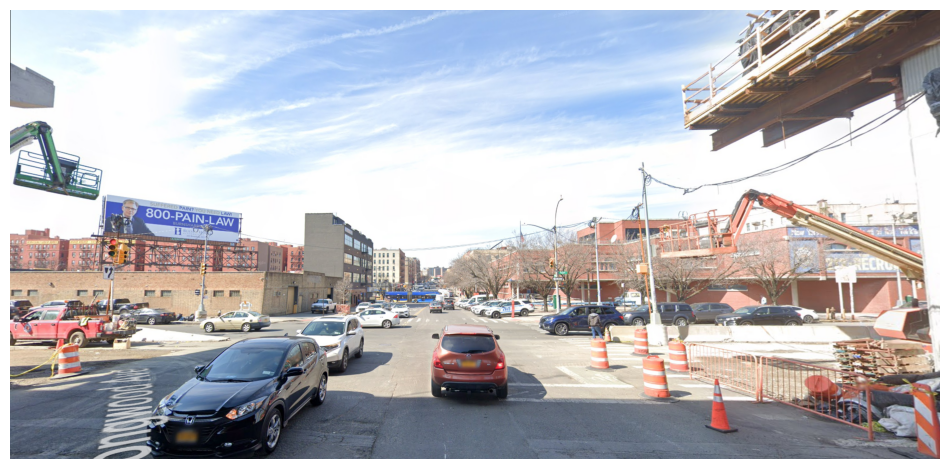

In [70]:
img = mpimg.imread(r"./graphs/intersection_LONGWOOD-BRUCKNER.png")
plt.figure(figsize=(12,16))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

It looks like the paths itself look a bit confusing, there is no specific light for turns only, and it may be one of the reasons for such high number of collisions.  

Let's inspect high impact collisions for injuries among cyclists and pedestrians, that way we can understand where this types of collisions happen.

In [71]:
# Filter out data to show only last 5 years and n injured > 0
map_data = df[(df['crash_date_year_month'] > '2019-01')&((df['pedestrians_injured'] > 0)|(df['cyclist_injured'] > 0))]

# Choose only desired columns
map_data = map_data[['latitude', 'longitude', 'pedestrians_injured', 'cyclist_injured', 'crash_date_year_month']]

# Drop Na's
map_data = map_data.dropna(subset=['latitude', 'longitude'])

# Drop lat and long values of 0
map_data = map_data[~((map_data['latitude'] == 0) & (map_data['longitude'] == 0))]

# Group by location and injured people
map_data = map_data.groupby(['latitude', 'longitude', 'pedestrians_injured', 'cyclist_injured']).size().sort_values(ascending=False).reset_index(name='count')

# Create ranking to choose top numbers
map_data['rank'] = map_data['count'].rank(method='dense', ascending=False).astype(int)
map_data = map_data.loc[(map_data['rank'] <= 10)|(map_data['pedestrians_injured'] > 4)|(map_data['cyclist_injured'] > 2)]

In [72]:
# Define size column where we multiply count by n of injured depending if it's cyclist or pedestrian
map_data['size'] = map_data.apply(
    lambda row: row['count'] * row['pedestrians_injured'] if row['pedestrians_injured'] > 0 else row['count'] * row['cyclist_injured'], axis=1
).astype(int)

In [73]:
# Check the color codes 
print(px.colors.qualitative.Set1)

['rgb(228,26,28)', 'rgb(55,126,184)', 'rgb(77,175,74)', 'rgb(152,78,163)', 'rgb(255,127,0)', 'rgb(255,255,51)', 'rgb(166,86,40)', 'rgb(247,129,191)', 'rgb(153,153,153)']


In [74]:
# Create a color palette for our categories
palette = {
    "Cyclist": "rgb(55,126,184)",            
    "Cyclist (Single Large)": "rgb(152,78,163)",
    "Pedestrian": "rgb(228,26,28)",
    "Pedestrian (Single Large)": "rgb(255,127,0)"
}

# Update incident_type based on conditions
map_data['incident_type'] = map_data.apply(
    lambda row: 'Pedestrian (Single Large)' if row['count'] == 1 and row['size'] > 3 and row['pedestrians_injured'] > 0 
    else 'Cyclist (Single Large)' if row['count'] == 1 and row['size'] > 2 and row['cyclist_injured'] > 0 
    else 'Pedestrian' if row['pedestrians_injured'] > 0 
    else 'Cyclist' if row['cyclist_injured'] > 0
    else None, axis=1
)

# Create scattermapbox 
fig = px.scatter_mapbox(map_data,
                        lat="latitude",
                        lon="longitude",
                        color="incident_type",
                        size="size",
                        hover_name="rank",
                        hover_data={"latitude": False, "longitude": False, "pedestrians_injured": True, "cyclist_injured": True},
                        color_discrete_map=palette,
                        size_max=18,
                        zoom=10)

# Update layout
fig.update_layout(
    mapbox_style="open-street-map",
    title = {
        'text':'<b>High Impact Collisions: Pedestrians and Cyclists</b>',
        'font':{
            'size': 26
        },
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    height = 800)

fig.show()


Most high impact collisions fall on intersections, which is again, the most dangerous place for any type of collisions. Also, big number of high impact collisions are in Bronx and some are in Brooklyn. So, despite the fact that most collisions happen in Brooklyn, the most dangerous, biggest ones, high impact ones are happening in Bronx and Manhattan, which may be due to the fact of poor sign placements, a lot of rush, and of course, driver distraction and inattention.

In the end, there was an idea to perform analysis on biggest fatalities (highest number of people involved as well as different categories), but after investigating all of them, they differ from what we were doing throughout the analysis, and do not fit in here. There are not much insights and suggestions to make after inspecting them, so we will skip and not include them in this analysis.